# ● Goal
___
The goal of this week's HW is to conduct option pricing using Monte Carlo simulation. The term stucture used in the simulation follows Hull White model. <br/>
<br/>
(In HW4, we generate option price directly through the theory of Geometric Brownian Motion with fix interest rate. This time, we further consider the changing situation of the interest rate. By simulating option price many times, we can get an average option price, which should be close to the expected option price.)


# ● Work Flow Chart
___
<img src="https://drive.google.com/uc?export=view&id=1kpuoyzGLb5kCADUjKpe6aSVPSFx0sww-" >

# ● Step by step presentation
___


In [1]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Step1: 
## 請使用者輸入參數

In [ ]:
# GBM's State Variables
print("How long will the bond become mature? (in years)")
time_to_maturity = float(input())
print("How long is each period? (in years)")
time_unit = float(input())
print("What is the current Stock Price?")
S0 = float(input())
print("What is the riskless interest rate per period? (% p.a.)")
risk_free_rate = float(input())/100
print("What is the strike price")
strike_price = float(input())

# parameter of Hull White Process
print("What is the Volatility of the stock?(% p.a.)")
sigma = float(input())/100
print("What is the speed of the reversion to the mean?(% p.a.)")
a = float(input())/100
print("What is the forward rate of the stock?(% p.a.)")
forward_rate = float(input())/100
print("How many scenarios you would like to simulate?")
num_paths = int(input())
print("What’s today’s date?(type day first, then month, and then year)")
day, month, year = int(input("What's date today?")), int(input("What's the month today?")), int(input("What's the year today?")) 
todays_date = ql.Date(day, month, year)
day_count = ql.Thirty360()

timestep = round(time_to_maturity/time_unit) #timestep=360

In [9]:
## Example parameter
# GBM's State Variables
time_to_maturity = 10 #T (in years)
num_paths = 100 # Path
time_unit = 1/12 #dt
S0 = 100
risk_free_rate = 0.01
strike_price = 105

# parameter of Hull White Process
sigma = 0.1 #volatility
a = 0.1
forward_rate = 0.05
day_count = ql.Thirty360()
todays_date = ql.Date(13, 5, 2020)
timestep = round(time_to_maturity/time_unit) #timestep=360

## Step2: 
## 使用Hull White Term Structure模擬一種情境下的Short rate
參考修改自http://gouthamanbalaraman.com/blog/hull-white-simulation-quantlib-python.html


In [10]:
ql.Settings.instance().evaluationDate = todays_date

spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

In [11]:
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, time_to_maturity, timestep, rng, False)

In [12]:
def generate_short_rate(timestep):
    sample_path = seq.next()
    path = sample_path.value()
    time = [path.time(j) for j in range(len(path))]
    value = [path[j] for j in range(len(path))]
    r = np.array(value)
    return np.array(time), r

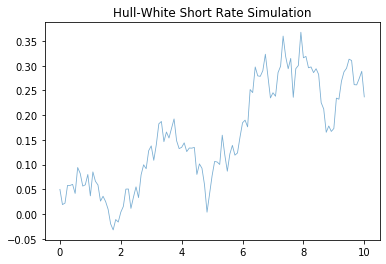

[ 0.05        0.01920631  0.02222647  0.05803097  0.05795772  0.06009907
  0.04176827  0.0942465   0.08229955  0.05669454  0.05917186  0.08019011
  0.03688713  0.08540933  0.06634024  0.05889325  0.02627863  0.03607642
  0.02561391  0.00976779 -0.01983845 -0.03199826 -0.01097558 -0.01606578
  0.00381826  0.01548026  0.05055409  0.05070353  0.01144513  0.0343363
  0.05515447  0.03327759  0.07919147  0.0997305   0.09177025  0.12832061
  0.13795192  0.10872881  0.14025035  0.18261499  0.18737519  0.14645325
  0.16605429  0.15387439  0.17339978  0.19253208  0.14847989  0.13241844
  0.13501189  0.1440826   0.12640805  0.13364567  0.13339771  0.13485698
  0.08018352  0.10152259  0.09272619  0.05953102  0.00385519  0.04066461
  0.07760049  0.10652302  0.10535793  0.10036604  0.15959882  0.12002822
  0.08673603  0.12158854  0.13903159  0.11918986  0.12363476  0.15566009
  0.18466978  0.19003198  0.17641178  0.25191593  0.24573064  0.29764504
  0.27956844  0.27863026  0.29010416  0.32331929  0.

In [13]:
time, r = generate_short_rate(timestep)
plt.plot(time, r, lw=0.8, alpha=0.6)

plt.title("Hull-White Short Rate Simulation")
plt.show()

print(r) #模擬出來每一期的利率

## Step3: 
## 將步驟二模擬出來的Short rate代入GBM中，模擬股價(一條path)

In [14]:
S = []
n = round(time_to_maturity/time_unit)
W = [0] + np.random.standard_normal(size = 1) # size=n，模擬「不同期的變化會不同」
W = float(W)
for i in range(len(time)):
    X = (float(r[i])-0.5*sigma**2)*float(time[i]) + sigma*W  #即老師Week6講義的第29頁第一式子exp裡面的東西
    S.append(S0*np.exp(X))  #即老師Week6講義的第29頁第一式子exp之外剩餘的東西
    W = (W + np.random.standard_normal(size = 1))*np.sqrt(time_unit)
    W = float(W)

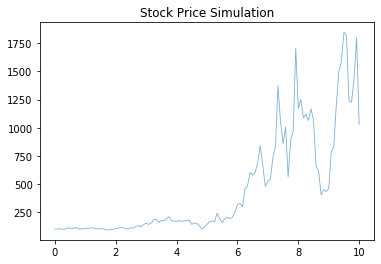

[98.92024211067478, 100.02250467386338, 103.54390151534223, 98.20173095990693, 98.96646831917926, 109.44438417632966, 107.36360133848508, 102.36791885773107, 112.60588827625502, 107.54846870868016, 97.58121843555809, 106.68394560094482, 101.81269656910514, 106.6486483653129, 108.47704038835673, 110.84437583999178, 101.64064635959214, 103.11105034706935, 101.34913278695832, 103.76497063140258, 93.74082270685278, 92.37076359029189, 94.23966772722008, 97.47881242386855, 104.16550490846465, 106.482313435874, 112.18057040233558, 112.73980203459686, 100.51001375844595, 103.73064957400011, 110.85054704218949, 108.09093175231597, 124.40805013934755, 129.26941413442233, 120.51410725540168, 138.5640635935156, 152.63058086081463, 141.4734093447052, 153.28395066249578, 182.9022471183252, 188.27197593971394, 158.9682285900083, 176.46674961137109, 174.0363214168521, 188.13768152686558, 210.93302678422137, 172.88883312601303, 172.72377658217565, 165.42345349902016, 175.74998206982434, 169.03694330477

In [15]:
plt.plot(time, S, lw=0.8, alpha=0.6)

plt.title("Stock Price Simulation")
plt.show()

print(S)

## Step4: 
## 根據步驟三當中模擬出來的股價，計算該路徑的所有payoff折現到今日的價格(價值)

In [16]:
pay_offs = 0
total_scenarios = len(S)

for i in range(total_scenarios):
    price = S[i]
    pay_off = price - strike_price
    if(pay_off>0): 
        pay_offs = pay_offs + np.exp(-1.0*risk_free_rate*i)*pay_off
        
pay_offs

16088.435573879284

## Step5: 
## 用Monte Carlo模擬多個路徑情況，並將所有模擬出來的情境平均，得到一個最終的Call/Put價格

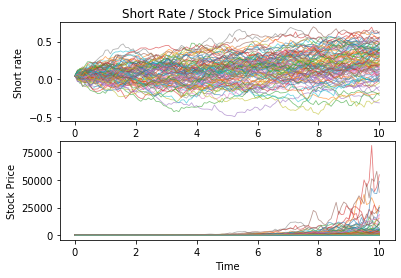

30756.608996550534


In [17]:
import warnings
warnings.filterwarnings("ignore")

#將上述模擬一條路徑的程式碼打包到一個function中，依據使用者輸入想要模擬的次數用迴圈執行Monte Carlo，產生多個路徑以及每個路徑的折現價格(價值)
def Simulate(time_to_maturity, time_unit, S0, risk_free_rate, strike_price, sigma, a, forward_rate, todays_date):
    
    
    # 模擬不同期的interest rate
    day_count = ql.Thirty360()
    timestep = round(time_to_maturity/time_unit) 
    time, r = generate_short_rate(timestep)
    plt.subplot(2, 1, 1)
    plt.plot(time, r, lw=0.8, alpha=0.6)
    plt.title("Short Rate / Stock Price Simulation")
    plt.ylabel('Short rate')
    
    # 模擬不同期的stock price (base on模擬出來不同期的interest rate)
    S = []
    n = round(time_to_maturity/time_unit)
    W = [0] + np.random.standard_normal(size = 1) # size=n，模擬「不同期的變化會不同」
    W = float(W)
    for i in range(len(time)):
        X = (float(r[i])-0.5*sigma**2)*float(time[i]) + sigma*W  #即老師Week6講義的第29頁第一式子exp裡面的東西
        S.append(S0*np.exp(X))  #即老師Week6講義的第29頁第一式子exp之外剩餘的東西
        W = (W + np.random.standard_normal(size = 1))*np.sqrt(time_unit)
        W = float(W)
    plt.subplot(2, 1, 2)
    plt.plot(time, S, lw=0.8, alpha=0.6)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    
    # 依據模擬出來最後一期的stock price計算payoff，折現回本期加總即為此次債券模擬出來的當期價格
    pay_offs = 0
    total_scenarios = len(S)
    for i in range(total_scenarios):
        price = S[i]
        pay_off = price - strike_price
        if(pay_off>0): 
            pay_offs = pay_offs + np.exp(-1.0*risk_free_rate*i)*pay_off 
    return pay_offs


price = []
for i in range(num_paths):
    price.append(Simulate(time_to_maturity = 30, time_unit = 1/12, S0 = 100, risk_free_rate = 0.01, strike_price = 105, sigma = 0.1, a = 0.1, forward_rate = 0.05, todays_date = ql.Date(15, 1, 2015)))

plt.show()
price = sum(price) / len(price)
print(price)